# sklearn-LDA

代码示例：https://mp.weixin.qq.com/s/hMcJtB3Lss1NBalXRTGZlQ （玉树芝兰） <br>
可视化：https://blog.csdn.net/qq_39496504/article/details/107125284  <br>
sklearn lda参数解读:https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
<br>中文版参数解读：https://blog.csdn.net/TiffanyRabbit/article/details/76445909
<br>LDA原理-视频版：https://www.bilibili.com/video/BV1t54y127U8
<br>LDA原理-文字版：https://www.jianshu.com/p/5c510694c07e
<br>score的计算方法：https://github.com/scikit-learn/scikit-learn/blob/844b4be24d20fc42cc13b957374c718956a0db39/sklearn/decomposition/_lda.py#L729
<br>主题困惑度1：https://blog.csdn.net/weixin_43343486/article/details/109255165
<br>主题困惑度2：https://blog.csdn.net/weixin_39676021/article/details/112187210

## 1.预处理

In [27]:
import os
import pandas as pd
import re
import jieba
import jieba.posseg as psg
from wordcloud import WordCloud 
import numpy as np
from PIL import Image

In [31]:
data=pd.read_csv("vec_data.csv")

In [32]:
mask = np.array(Image.open("图片1.jpg"))

In [33]:
text = data['text'].values.tolist() 

In [34]:
text1=''
for i in text:
    text1=text1+i

In [35]:
wordcloud = WordCloud(background_color="white",\
                      width = 800,\
                      height = 600,\
                      max_words = 200,\
                      max_font_size = 80,\
                      mask = mask,\
                      contour_width = 3,\
                      contour_color = 'steelblue',
                      font_path='simfang.ttf'
                      ).generate(text1)
wordcloud.to_file('Alice_词云图.png')

## 2.LDA分析

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [37]:
def print_top_words(model, feature_names, n_top_words):
    tword = []
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        topic_w = " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        tword.append(topic_w)
        print(topic_w)
    return tword

In [38]:
n_features = 1000 #提取1000个特征词语
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english',
                                max_df = 0.5,
                                min_df = 10)
tf = tf_vectorizer.fit_transform(data.text)

In [47]:
n_topics = 4
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=50,
                                learning_method='batch',
                                learning_offset=50,
                               random_state=0)
lda.fit(tf)

LatentDirichletAllocation(learning_offset=50, max_iter=50, n_components=4,
                          random_state=0)

### 2.1输出每个主题对应词语 

In [48]:
n_top_words = 8
tf_feature_names = tf_vectorizer.get_feature_names()
topic_word = print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
美国 世界 和平 战争 中国 俄罗斯 冲突 支持
Topic #1:
以色列 支持 哈马斯 中东 恐怖组织 建国 你家 历史
Topic #2:
巴勒斯坦 以色列 中国 日本 人民 哈马斯 同意 联合国
Topic #3:
犹太人 国家 巴勒斯坦 以色列 建国 土地 阿拉伯 阿拉伯人


### 2.4困惑度 

In [10]:
import matplotlib.pyplot as plt

In [11]:
plexs = []
scores = []
n_max_topics = 16
for i in range(1,n_max_topics):
    print(i)
    lda = LatentDirichletAllocation(n_components=i, max_iter=50,
                                    learning_method='batch',
                                    learning_offset=50,random_state=0)
    lda.fit(tf)
    plexs.append(lda.perplexity(tf))
    scores.append(lda.score(tf))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


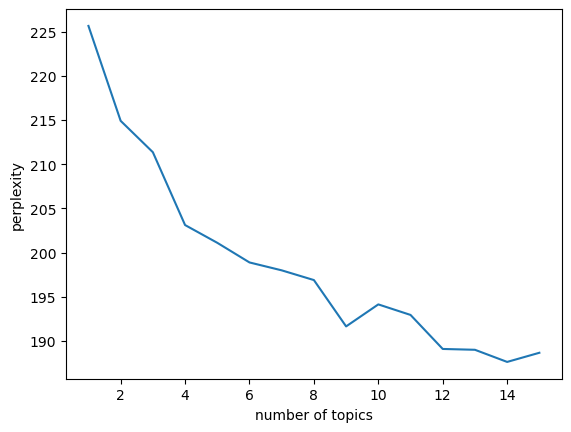

In [12]:
n_t=15#区间最右侧的值。注意：不能大于n_max_topics
x=list(range(1,n_t+1))
plt.plot(x,plexs[0:n_t])
plt.xlabel("number of topics")
plt.ylabel("perplexity")
plt.show()

### 2.2输出每篇文章对应主题 

In [49]:
import numpy as np

In [50]:
topics=lda.transform(tf)

In [53]:
topic = []
for t in topics:
    topic.append("Topic #"+str(list(t).index(np.max(t))))
data=pd.read_csv("vec_data.csv")
data['概率最大的主题序号']=topic
data['每个主题对应概率']=list(topics)
data.to_excel("data_topic.xlsx",index=False)